In [1]:
import numpy as np
import cv2

In [ ]:
!wget https://github.com/dididogdididog/Intelligent-Systems-Theory-Final-Project/raw/main/datas.zip

--2022-06-09 10:17:20--  https://github.com/dididogdididog/Intelligent-Systems-Theory-Final-Project/raw/main/datas.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dididogdididog/Intelligent-Systems-Theory-Final-Project/main/datas.zip [following]
--2022-06-09 10:17:20--  https://raw.githubusercontent.com/dididogdididog/Intelligent-Systems-Theory-Final-Project/main/datas.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67477807 (64M) [application/zip]
Saving to: ‘datas.zip’

datas.zip           100%[===================>]  64.35M   217MB/s    in 0.3s    

2022-06-09 10:17:21 (217 MB/s) - ‘da

In [ ]:
!unzip datas.zip

串流輸出內容已截斷至最後 5000 行。
  inflating: datas/test data/pictures20/241.jpg  
  inflating: datas/test data/pictures20/242.jpg  
  inflating: datas/test data/pictures20/243.jpg  
  inflating: datas/test data/pictures20/244.jpg  
  inflating: datas/test data/pictures20/245.jpg  
  inflating: datas/test data/pictures20/246.jpg  
  inflating: datas/test data/pictures20/247.jpg  
  inflating: datas/test data/pictures20/248.jpg  
  inflating: datas/test data/pictures20/249.jpg  
  inflating: datas/test data/pictures20/25.jpg  
  inflating: datas/test data/pictures20/250.jpg  
  inflating: datas/test data/pictures20/251.jpg  
  inflating: datas/test data/pictures20/252.jpg  
  inflating: datas/test data/pictures20/253.jpg  
  inflating: datas/test data/pictures20/254.jpg  
  inflating: datas/test data/pictures20/255.jpg  
  inflating: datas/test data/pictures20/256.jpg  
  inflating: datas/test data/pictures20/257.jpg  
  inflating: datas/test data/pictures20/258.jpg  
  inflating: datas/test data/p

In [2]:
def image_processing(image):
  image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  return image[100:,:]

In [3]:
#load turn angle
turnAngles=list()
images=list()
for j in range(6,16):
  count=0
  with open('datas/training data/turn'+str(j)+'.txt') as f:
    for line in f:
      count+=1
      turnAngles.append(float(line.split()[1]))
  for i in range(count):
    image=cv2.imread('datas/training data/pictures'+str(j)+'/'+str(i)+'.jpg')
    image=image_processing(image)
    images.append(image)
num_images=len(turnAngles)

In [4]:
#images augmentation by flipping
for i in range(num_images):
  image=images[i]
  image=cv2.flip(image,1)
  images.append(image)

  turnAngle=-turnAngles[i]
  turnAngles.append(turnAngle)
num_images=num_images*2
images=np.array(images)
turnAngles=np.array(turnAngles)

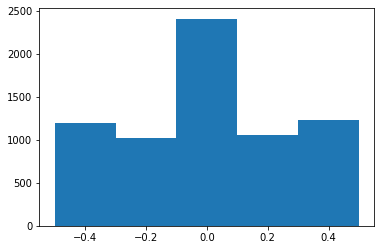

In [5]:
import matplotlib.pyplot as plt
plt.hist(turnAngles,bins=[-0.5,-0.3,-0.1,0.1,0.3,0.5])
plt.show()

In [6]:
images.shape

(6920, 140, 320)

In [7]:
images_flat=images.reshape(images.shape[0],images.shape[1]*images.shape[2])

In [8]:
images_flat=images_flat/255

In [9]:
from sklearn.model_selection import train_test_split
X_train1, X_val1, y_train1, y_val1=train_test_split(images_flat,turnAngles,test_size=0.2,random_state=42)

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Lambda
from keras.layers import Conv2D
from keras.layers import Flatten


In [12]:
model1 = Sequential()
model1.add(Dense(32, input_shape=(X_train1.shape[1],), activation="sigmoid"))
model1.add(Dense(1))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                1433632   
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,433,665
Trainable params: 1,433,665
Non-trainable params: 0
_________________________________________________________________


In [13]:
model1.compile(loss='mean_squared_error', optimizer='sgd')
model1.fit(X_train1,y_train1,epochs=100,batch_size=32)

Epoch 1/100
173/173 [==============================] - 3s 4ms/step - loss: 0.2025
Epoch 2/100
173/173 [==============================] - 1s 4ms/step - loss: 0.0738
Epoch 3/100
173/173 [==============================] - 1s 4ms/step - loss: 0.0735
Epoch 4/100
173/173 [==============================] - 1s 4ms/step - loss: 0.0688
Epoch 5/100
173/173 [==============================] - 1s 4ms/step - loss: 0.0606
Epoch 6/100
173/173 [==============================] - 1s 4ms/step - loss: 0.0556
Epoch 7/100
173/173 [==============================] - 1s 4ms/step - loss: 0.0520
Epoch 8/100
173/173 [==============================] - 1s 4ms/step - loss: 0.0483
Epoch 9/100
173/173 [==============================] - 1s 4ms/step - loss: 0.0446
Epoch 10/100
173/173 [==============================] - 1s 4ms/step - loss: 0.0427
Epoch 11/100
173/173 [==============================] - 1s 4ms/step - loss: 0.0420
Epoch 12/100
173/173 [==============================] - 1s 4ms/step - loss: 0.0391
Epoch 13/100


In [14]:
model2 = Sequential()
model2.add(Dropout(0.2,input_shape=(X_train1.shape[1],)))
model2.add(Dense(32, activation="sigmoid"))
model2.add(Dropout(0.2))
model2.add(Dense(1))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 44800)             0         
                                                                 
 dense_2 (Dense)             (None, 32)                1433632   
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,433,665
Trainable params: 1,433,665
Non-trainable params: 0
_________________________________________________________________


In [15]:
model2.compile(loss='mean_squared_error', optimizer='sgd')
model2.fit(X_train1,y_train1,epochs=100,batch_size=32)

Epoch 1/100
173/173 [==============================] - 2s 6ms/step - loss: 0.1196
Epoch 2/100
173/173 [==============================] - 1s 6ms/step - loss: 0.0686
Epoch 3/100
173/173 [==============================] - 1s 7ms/step - loss: 0.0626
Epoch 4/100
173/173 [==============================] - 1s 7ms/step - loss: 0.0573
Epoch 5/100
173/173 [==============================] - 1s 8ms/step - loss: 0.0543
Epoch 6/100
173/173 [==============================] - 1s 6ms/step - loss: 0.0518
Epoch 7/100
173/173 [==============================] - 1s 4ms/step - loss: 0.0501
Epoch 8/100
173/173 [==============================] - 1s 4ms/step - loss: 0.0488
Epoch 9/100
173/173 [==============================] - 1s 4ms/step - loss: 0.0467
Epoch 10/100
173/173 [==============================] - 1s 4ms/step - loss: 0.0448
Epoch 11/100
173/173 [==============================] - 1s 4ms/step - loss: 0.0444
Epoch 12/100
173/173 [==============================] - 1s 4ms/step - loss: 0.0433
Epoch 13/100


In [16]:
X_train2, X_val2, y_train2, y_val2=train_test_split(images,turnAngles,test_size=0.2,random_state=42)

In [17]:
model3 = Sequential()
model3.add(Lambda(lambda x: x / 127.5 - 1., input_shape=(140,320, 1)))
model3.add(Conv2D(24, (5, 5),(3,3), padding='valid',activation='relu'))
model3.add(Conv2D(36, (5, 5),(3,3), padding='valid',activation='relu'))
model3.add(Conv2D(48, (5, 5),(2,2), padding='valid',activation='relu'))
model3.add(Conv2D(64, (3, 3),(1,1), padding='valid',activation='relu'))
model3.add(Conv2D(64, (3, 3),(1,1), padding='valid',activation='relu'))
model3.add(Flatten())
model3.add(Dense(1164,activation='relu'))
model3.add(Dense(100,activation='relu'))
model3.add(Dense(50,activation='relu'))
model3.add(Dense(10,activation='relu'))
model3.add(Dense(1))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 140, 320, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 46, 106, 24)       624       
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 34, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 15, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 13, 64)         27712     
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 11, 64)         36928     
                                                                 
 flatten (Flatten)           (None, 704)              

In [18]:
model3.compile(loss='mean_squared_error', optimizer='sgd')
model3.fit(X_train2,y_train2,epochs=10,batch_size=32)

Epoch 1/10
173/173 [==============================] - 11s 9ms/step - loss: 0.0727
Epoch 2/10
173/173 [==============================] - 1s 8ms/step - loss: 0.0705
Epoch 3/10
173/173 [==============================] - 1s 8ms/step - loss: 0.0676
Epoch 4/10
173/173 [==============================] - 1s 8ms/step - loss: 0.0633
Epoch 5/10
173/173 [==============================] - 1s 8ms/step - loss: 0.0574
Epoch 6/10
173/173 [==============================] - 1s 8ms/step - loss: 0.0500
Epoch 7/10
173/173 [==============================] - 1s 8ms/step - loss: 0.0421
Epoch 8/10
173/173 [==============================] - 1s 8ms/step - loss: 0.0345
Epoch 9/10
173/173 [==============================] - 1s 8ms/step - loss: 0.0275
Epoch 10/10
173/173 [==============================] - 1s 8ms/step - loss: 0.0215


In [19]:
model4 = Sequential()
model4.add(Lambda(lambda x: x / 127.5 - 1., input_shape=(140,320, 1)))
model4.add(Conv2D(24, (5, 5),(3,3), padding='valid',activation='relu'))
model4.add(Conv2D(36, (5, 5),(3,3), padding='valid',activation='relu'))
model4.add(Conv2D(48, (5, 5),(2,2), padding='valid',activation='relu'))
model4.add(Conv2D(64, (3, 3),(1,1), padding='valid',activation='relu'))
model4.add(Conv2D(64, (3, 3),(1,1), padding='valid',activation='relu'))
model4.add(Flatten())
model4.add(Dense(1164,activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(100,activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(50,activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(10,activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(1))
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 140, 320, 1)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 46, 106, 24)       624       
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 34, 36)        21636     
                                                                 
 conv2d_7 (Conv2D)           (None, 5, 15, 48)         43248     
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 13, 64)         27712     
                                                                 
 conv2d_9 (Conv2D)           (None, 1, 11, 64)         36928     
                                                                 
 flatten_1 (Flatten)         (None, 704)              

In [20]:
model4.compile(loss='mean_squared_error', optimizer='sgd')
model4.fit(X_train2,y_train2,epochs=100,batch_size=32)

Epoch 1/100
173/173 [==============================] - 2s 10ms/step - loss: 0.0730
Epoch 2/100
173/173 [==============================] - 2s 9ms/step - loss: 0.0719
Epoch 3/100
173/173 [==============================] - 2s 9ms/step - loss: 0.0704
Epoch 4/100
173/173 [==============================] - 2s 9ms/step - loss: 0.0683
Epoch 5/100
173/173 [==============================] - 2s 9ms/step - loss: 0.0661
Epoch 6/100
173/173 [==============================] - 2s 9ms/step - loss: 0.0619
Epoch 7/100
173/173 [==============================] - 2s 9ms/step - loss: 0.0567
Epoch 8/100
173/173 [==============================] - 2s 9ms/step - loss: 0.0522
Epoch 9/100
173/173 [==============================] - 2s 9ms/step - loss: 0.0471
Epoch 10/100
173/173 [==============================] - 2s 9ms/step - loss: 0.0431
Epoch 11/100
173/173 [==============================] - 2s 9ms/step - loss: 0.0394
Epoch 12/100
173/173 [==============================] - 2s 9ms/step - loss: 0.0353
Epoch 13/100

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
pred_train1=model1.predict(X_train1)
pred_val1=model1.predict(X_val1)
print("mse of train data:",mean_squared_error(pred_train1,y_train1))
print("mse of validation data:",mean_squared_error(pred_val1,y_val1))
print(pred_val1[:10])
print(y_val1[:10])

mse of train data: 0.015596779871774779
mse of validation data: 0.01996261358433908
[[-0.17239004]
 [ 0.2714445 ]
 [ 0.47281477]
 [ 0.03885297]
 [ 0.16824302]
 [ 0.0335903 ]
 [-0.33110017]
 [-0.09954592]
 [ 0.28815806]
 [ 0.1485382 ]]
[ 0.1   0.42  0.5   0.09  0.25  0.   -0.33  0.07  0.15  0.2 ]


In [23]:
pred_train2=model2.predict(X_train1)
pred_val2=model2.predict(X_val1)
print("mse of train data:",mean_squared_error(pred_train2,y_train1))
print("mse of validation data:",mean_squared_error(pred_val2,y_val1))
print(pred_val2[:10])
print(y_val1[:10])

mse of train data: 0.017652738469195985
mse of validation data: 0.02014591484519165
[[-0.08932312]
 [ 0.33772615]
 [ 0.3100594 ]
 [ 0.02133428]
 [ 0.15278247]
 [-0.03226927]
 [-0.23297557]
 [-0.02124581]
 [ 0.26426873]
 [ 0.21926597]]
[ 0.1   0.42  0.5   0.09  0.25  0.   -0.33  0.07  0.15  0.2 ]


In [24]:
pred_train3=model3.predict(X_train2)
pred_val3=model3.predict(X_val2)
print("mse of train data:",mean_squared_error(pred_train3,y_train2))
print("mse of validation data:",mean_squared_error(pred_val3,y_val2))
print(pred_val3[:10])
print(y_val2[:10])

mse of train data: 0.018183502744339677
mse of validation data: 0.01962565926675453
[[ 0.07715236]
 [ 0.29340777]
 [ 0.29812887]
 [ 0.07653713]
 [ 0.21507482]
 [ 0.04414755]
 [-0.26480323]
 [-0.01632629]
 [ 0.30723897]
 [ 0.29522118]]
[ 0.1   0.42  0.5   0.09  0.25  0.   -0.33  0.07  0.15  0.2 ]


In [25]:
pred_train4=model4.predict(X_train2)
pred_val4=model4.predict(X_val2)
print("mse of train data:",mean_squared_error(pred_train4,y_train2))
print("mse of validation data:",mean_squared_error(pred_val4,y_val2))
print(pred_val4[:10])
print(y_val2[:10])

mse of train data: 0.005716240197268883
mse of validation data: 0.007152079463083295
[[ 0.15756011]
 [ 0.4060255 ]
 [ 0.41662654]
 [ 0.08690348]
 [ 0.29774454]
 [ 0.04928374]
 [-0.29347208]
 [ 0.0373079 ]
 [ 0.36928004]
 [ 0.3334578 ]]
[ 0.1   0.42  0.5   0.09  0.25  0.   -0.33  0.07  0.15  0.2 ]


In [26]:
#load turn angle
turnAngles_test=list()
images_test=list()
for j in range(20,24):
  count=0
  with open('datas/test data/turn'+str(j)+'.txt') as f:
    for line in f:
      count+=1
      turnAngles_test.append(float(line.split()[1]))
  for i in range(count):
    image=cv2.imread('datas/test data/pictures'+str(j)+'/'+str(i)+'.jpg')
    image=image_processing(image)
    images_test.append(image)
num_images_test=len(turnAngles_test)

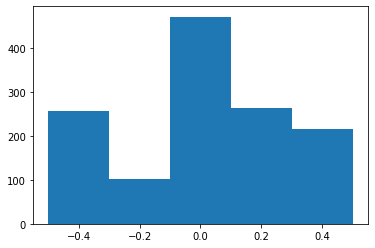

In [27]:
import matplotlib.pyplot as plt
plt.hist(turnAngles_test,bins=[-0.5,-0.3,-0.1,0.1,0.3,0.5])
plt.show()

In [28]:
images_test=np.array(images_test)
turnAngles_test=np.array(turnAngles_test)

In [29]:
images_test.shape

(1308, 140, 320)

In [30]:
images_flat_test=images_test.reshape(images_test.shape[0],images_test.shape[1]*images_test.shape[2])
images_flat_test=images_flat_test/255

In [31]:
from sklearn.utils import shuffle
images_flat_test,images_test,turnAngles_test=shuffle(images_flat_test,images_test,turnAngles_test)

In [32]:
pred_test1=model1.predict(images_flat_test)
print("mse of test data:",mean_squared_error(pred_test1,turnAngles_test))
print(pred_test1[:10])
print(turnAngles_test[:10])

mse of test data: 0.04874608229596299
[[ 0.19625464]
 [-0.1468887 ]
 [-0.0694646 ]
 [ 0.07703665]
 [-0.06399963]
 [ 0.02348593]
 [-0.22480573]
 [ 0.10573137]
 [-0.01174362]
 [ 0.03966001]]
[ 0.47  0.32  0.   -0.03  0.15  0.33  0.22  0.   -0.07 -0.26]


In [33]:
pred_test2=model2.predict(images_flat_test)
print("mse of test data:",mean_squared_error(pred_test2,turnAngles_test))
print(pred_test2[:10])
print(turnAngles_test[:10])

mse of test data: 0.04371590260255752
[[ 0.29371786]
 [-0.12899658]
 [ 0.07423884]
 [ 0.05426097]
 [ 0.06616358]
 [ 0.1124834 ]
 [-0.11805891]
 [ 0.01299396]
 [-0.06268184]
 [ 0.02696707]]
[ 0.47  0.32  0.   -0.03  0.15  0.33  0.22  0.   -0.07 -0.26]


In [34]:
pred_test3=model3.predict(images_test)
print("mse of test data:",mean_squared_error(pred_test3,turnAngles_test))
print(pred_test3[:10])
print(turnAngles_test[:10])

mse of test data: 0.06895004263215314
[[-0.3012892 ]
 [-0.35116416]
 [ 0.1763877 ]
 [-0.14491291]
 [ 0.06290464]
 [ 0.0076275 ]
 [-0.2722531 ]
 [-0.12371774]
 [-0.01627292]
 [-0.0869316 ]]
[ 0.47  0.32  0.   -0.03  0.15  0.33  0.22  0.   -0.07 -0.26]


In [35]:
pred_test4=model4.predict(images_test)
print("mse of test data:",mean_squared_error(pred_test4,turnAngles_test))
print(pred_test4[:10])
print(turnAngles_test[:10])

mse of test data: 0.04434206303206916
[[ 0.07807636]
 [-0.30269647]
 [ 0.08286862]
 [-0.15052491]
 [ 0.04724988]
 [ 0.04087034]
 [-0.25204894]
 [-0.00797187]
 [-0.1830771 ]
 [-0.14308903]]
[ 0.47  0.32  0.   -0.03  0.15  0.33  0.22  0.   -0.07 -0.26]
